In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [3]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

## 仕事の都道府県別の男女比較

In [12]:
df_selected = df[['男女の別', '都道府県', '仕事']].copy()

df_selected['仕事'] = pd.to_numeric(df_selected['仕事'], errors='coerce')


都道府県別の男女別仕事時間（平均）:

仕事時間の差 (男 - 女):
男女の別   0_総数    1_男    2_女  差 (男 - 女)
都道府県                                
愛知県   214.0  286.0  143.0      143.0
滋賀県   206.0  277.0  137.0      140.0
千葉県   209.0  276.0  142.0      134.0
奈良県   189.0  256.0  129.0      127.0
群馬県   209.0  272.0  146.0      126.0
埼玉県   200.0  263.0  138.0      125.0
広島県   203.0  267.0  143.0      124.0
宮城県   213.0  276.0  153.0      123.0
神奈川県  206.0  268.0  145.0      123.0
山形県   219.0  280.0  161.0      119.0
栃木県   221.0  281.0  162.0      119.0
京都府   186.0  248.0  130.0      118.0
静岡県   205.0  265.0  147.0      118.0
三重県   203.0  263.0  145.0      118.0
北海道   199.0  260.0  143.0      117.0
兵庫県   199.0  260.0  143.0      117.0
山梨県   217.0  276.0  160.0      116.0
秋田県   200.0  261.0  146.0      115.0
福岡県   203.0  264.0  149.0      115.0
全国    208.0  267.0  152.0      115.0
和歌山県  198.0  257.0  144.0      113.0
石川県   224.0  282.0  169.0      113.0
熊本県   205.0  263.0  152.0      111.0
愛媛県   198.0  256.0  145.0      111.0
大

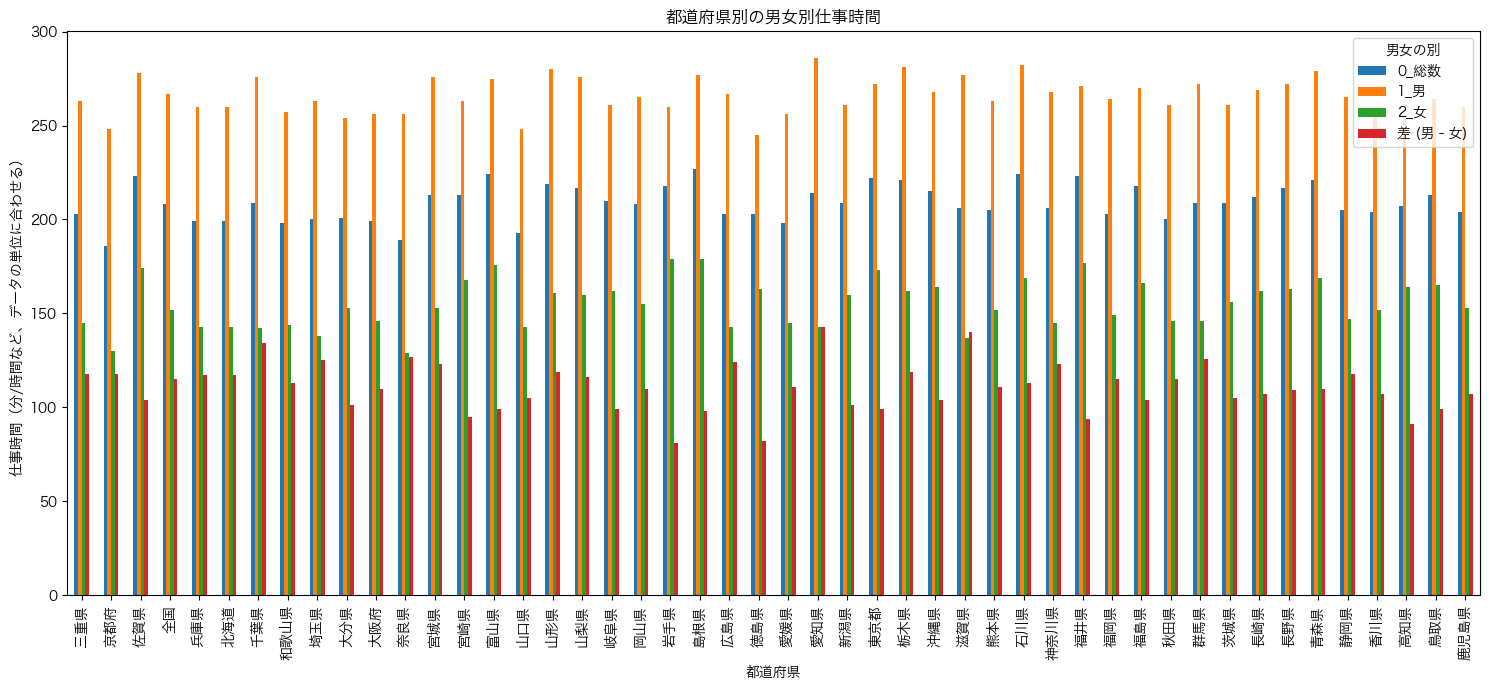

In [25]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

df_selected = df[['男女の別', '都道府県', '仕事']].copy()

df_selected['仕事'] = pd.to_numeric(df_selected['仕事'], errors='coerce')

# # NaN値がある行を削除するか、適切に処理する
# # 今回は比較のため、NaNがある行は削除するのが良いでしょう
# df_selected.dropna(subset=['仕事'], inplace=True)

# 男女別の仕事の時間を都道府県ごとに集計
# '男女の別' 列の値が '1_男' と '2_女' であると仮定します。
# もし異なる値が入っている場合は、適宜修正してください。

# ピボットテーブルを作成して、都道府県別に男女の仕事の時間を比較
pivot_df = df_selected.pivot_table(index='都道府県', columns='男女の別', values='仕事', aggfunc='mean')

# 結果を表示
print("\n都道府県別の男女別仕事時間（平均）:")
# 単純に都道府県別に男女の仕事の時間を比較したやつ
# print(pivot_df)

# 必要であれば、さらに詳細な分析や可視化を行うことができます。
# 例: 男性の仕事時間が女性より長い都道府県を特定
if '1_男' in pivot_df.columns and '2_女' in pivot_df.columns:
    pivot_df['差 (男 - 女)'] = pivot_df['1_男'] - pivot_df['2_女']
    print("\n仕事時間の差 (男 - 女):")
    # ここで差を計算して、男性の仕事時間が女性より長い都道府県を特定
    print(pivot_df.sort_values(by='差 (男 - 女)', ascending=False))


pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('都道府県別の男女別仕事時間')
plt.xlabel('都道府県')
plt.ylabel('仕事時間（分/時間など、データの単位に合わせる）')
plt.xticks(rotation=90)
plt.legend(title='男女の別')
plt.tight_layout()
plt.show()

### 分析考察
雇用形態: 男性がフルタイムでの雇用が主である一方、女性はパートタイムや短時間勤務を選択する割合が高い可能性があります。子育てや介護などの家庭内役割が女性に偏っている現状が背景にあるかもしれません。

産業構造: 男性が多く従事する産業（製造業、建設業など）が長時間労働の傾向にあるのに対し、女性が多く従事する産業（サービス業、医療・福祉など）は比較的短時間労働である可能性も考えられます。

比較的長時間: 佐賀県（総数 223.0）、富山県（総数 224.0）、福井県（総数 223.0）などは全体的に仕事時間が長い傾向にあります。特に富山県や福井県は男性の仕事時間も長く、女性の仕事時間も比較的長い部類に入ります。

比較的短時間: 京都府（総数 186.0）、奈良県（総数 189.0）、山口県（総数 193.0）などは全体的に仕事時間が短い傾向にあります。

産業構造の違い: 各都道府県の主要産業や経済状況が仕事時間に影響を与えている可能性があります。例えば、製造業が盛んな地域では長時間労働が一般的である一方、観光業やサービス業が中心の地域では勤務形態が多様であることも考えられます。

通勤・通学時間: データには含まれていませんが、通勤・通学時間が長い地域では、実質的な拘束時間が長くなり、それが仕事時間に影響を与える可能性もあります。

生活習慣・文化: 地域ごとの生活習慣やワークライフバランスに対する意識の違いも、仕事時間の差に影響しているかもしれません。

## 家事の都道府県別男女比較


都道府県別の男女別家事時間（平均）:

仕事時間の差 (女 - 男):
男女の別   0_総数   1_男    2_女  差 (女 - 男)
都道府県                               
奈良県   100.0  22.0  170.0      148.0
滋賀県    93.0  23.0  160.0      137.0
静岡県    92.0  26.0  158.0      132.0
長崎県    93.0  23.0  155.0      132.0
秋田県    95.0  26.0  158.0      132.0
三重県    91.0  25.0  156.0      131.0
和歌山県   95.0  26.0  157.0      131.0
京都府    94.0  26.0  157.0      131.0
兵庫県    89.0  21.0  150.0      129.0
愛知県    86.0  22.0  151.0      129.0
山口県    92.0  25.0  153.0      128.0
岡山県    91.0  26.0  152.0      126.0
愛媛県    93.0  27.0  153.0      126.0
千葉県    87.0  24.0  150.0      126.0
埼玉県    91.0  28.0  153.0      125.0
茨城県    85.0  23.0  148.0      125.0
神奈川県   89.0  27.0  152.0      125.0
熊本県    88.0  23.0  147.0      124.0
栃木県    85.0  23.0  147.0      124.0
宮崎県    89.0  24.0  147.0      123.0
岐阜県    88.0  25.0  148.0      123.0
青森県    83.0  19.0  141.0      122.0
長野県    91.0  29.0  151.0      122.0
福岡県    84.0  21.0  142.0      121.0
徳島県    87.0  24.0  145.0   

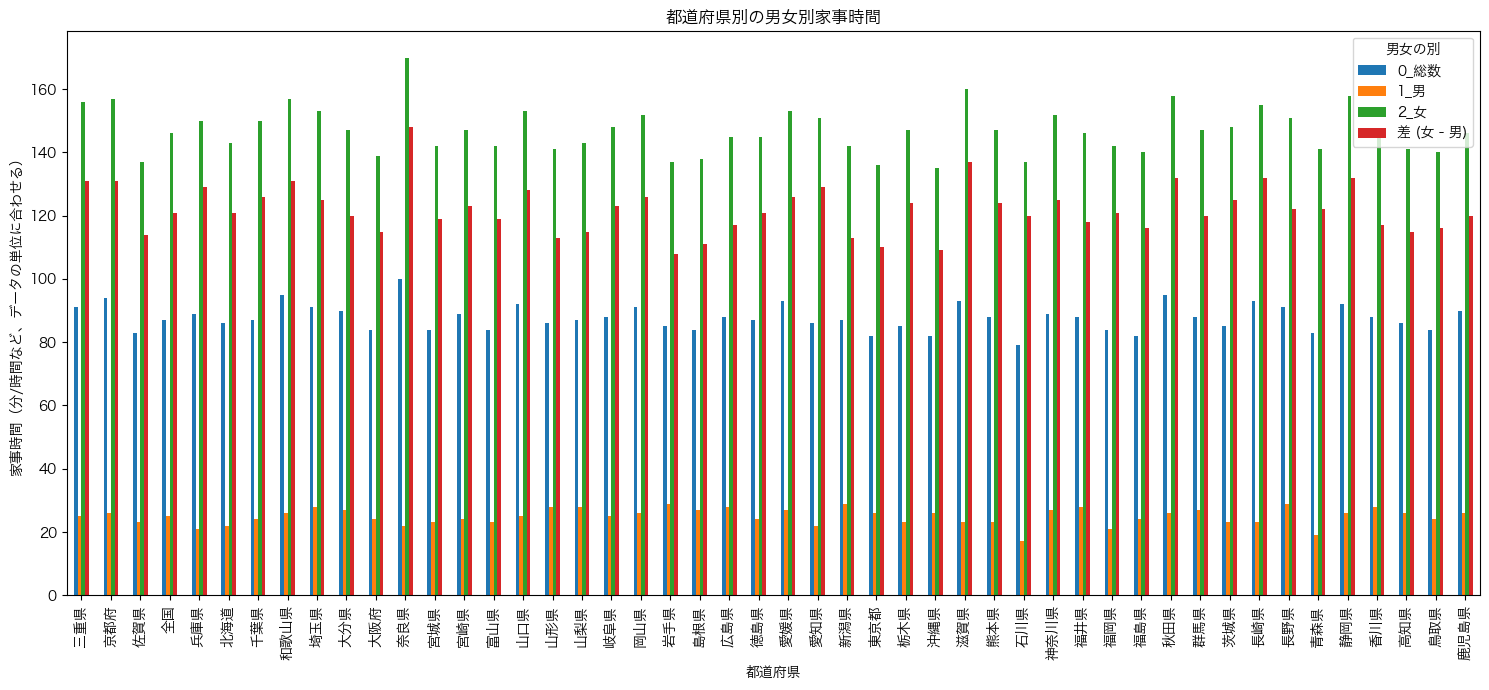

In [27]:
df_selected = df[['男女の別', '都道府県', '家事']].copy()

df_selected['家事'] = pd.to_numeric(df_selected['家事'], errors='coerce')

# # NaN値がある行を削除するか、適切に処理する
# # 今回は比較のため、NaNがある行は削除するのが良いでしょう
# df_selected.dropna(subset=['仕事'], inplace=True)

# 男女別の仕事の時間を都道府県ごとに集計
# '男女の別' 列の値が '1_男' と '2_女' であると仮定します。
# もし異なる値が入っている場合は、適宜修正してください。

# ピボットテーブルを作成して、都道府県別に男女の仕事の時間を比較
pivot_df = df_selected.pivot_table(index='都道府県', columns='男女の別', values='家事', aggfunc='mean')

# 結果を表示
print("\n都道府県別の男女別家事時間（平均）:")
# print(pivot_df)

# 必要であれば、さらに詳細な分析や可視化を行うことができます。
# 例: 男性の仕事時間が女性より長い都道府県を特定
if '2_女' in pivot_df.columns and '1_男' in pivot_df.columns:
    pivot_df['差 (女 - 男)'] = pivot_df['2_女'] - pivot_df['1_男']
    print("\n仕事時間の差 (女 - 男):")
    print(pivot_df.sort_values(by='差 (女 - 男)', ascending=False))

#グラフでの可視化の例 (matplotlibやseabornを使用)
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('都道府県別の男女別家事時間')
plt.xlabel('都道府県')
plt.ylabel('家事時間（分/時間など、データの単位に合わせる）')
plt.xticks(rotation=90)
plt.legend(title='男女の別')
plt.tight_layout()
plt.show()

### 考察
社会的背景: この格差は、依然として根強く残る性別役割分担意識や、女性が主に家事・育児・介護といった無償労働を担うという社会構造を反映していると考えられます。男性の育児休業取得率の低さや、長時間労働が常態化している日本の企業文化も影響している可能性があります。

差が大きい都道府県: 奈良県 (148.0)、滋賀県 (137.0)、静岡県 (132.0)、長崎県 (132.0)、秋田県 (132.0) などは、女性が男性よりも家事をする時間の差が大きい地域です。

差が小さい都道府県: 沖縄県 (109.0)、東京都 (110.0)、島根県 (111.0)、岩手県 (108.0) などは、家事時間の男女差が比較的小さい地域です。

都市部と地方: 興味深いのは、東京都や沖縄県といった都市部や特殊な生活様式を持つ地域で差が小さい傾向が見られることです。これは、共働き世帯の割合が高い、核家族化が進んでいる、あるいは都市生活における家事サービス利用が進んでいるなどの要因が影響している可能性があります。

女性の就業率: 女性の就業率が高い地域では、家事分担への意識が高まり、男女間の家事時間の差が縮まる傾向があるかもしれません。

高齢化率: 高齢化が進む地域では、世帯構成や介護の負担が家事時間に影響を与える可能性も考えられます。

地域の文化・慣習: 地域に根ざした性別役割分担の意識の強弱が、家事時間の差に影響を与えている可能性も否定できません。

### 家事仕事時間からの考察
仕事時間の男女差が小さい地域 ＆ 家事時間の男女差が小さい地域:

もし両方の差が小さい都道府県があれば、その地域は男女間の役割分担が比較的均等に進んでいる可能性があります。例えば、共働きが一般的で、男性も積極的に家事・育児に参加する文化が根付いているのかもしれません。

東京都や沖縄県が家事時間の男女差が比較的小さかったことは、都市部での共働き率の高さや、より多様なライフスタイルが受け入れられている可能性を示唆します。
